<a href="https://colab.research.google.com/github/TharushaVJ/Data-Structures-and-Algorithms/blob/main/Gym_enviroment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gym

In [1]:
import gym
import numpy as np
import random

# create Taxi environment
env = gym.make('Taxi-v3',
               render_mode='ansi')

# create a new instance of taxi, and get the initial state
state = env.reset()

num_steps = 99
for s in range(num_steps+1):
    print(f"step: {s} out of {num_steps}")

    # sample a random action from the list of available actions
    action = env.action_space.sample()

    # perform this action on the environment
    env.step(action)

    # print the new state


# end this instance of the taxi environment
env.close()

step: 0 out of 99
step: 1 out of 99
step: 2 out of 99
step: 3 out of 99
step: 4 out of 99
step: 5 out of 99
step: 6 out of 99
step: 7 out of 99
step: 8 out of 99
step: 9 out of 99
step: 10 out of 99
step: 11 out of 99
step: 12 out of 99
step: 13 out of 99
step: 14 out of 99
step: 15 out of 99
step: 16 out of 99
step: 17 out of 99
step: 18 out of 99
step: 19 out of 99
step: 20 out of 99
step: 21 out of 99
step: 22 out of 99
step: 23 out of 99
step: 24 out of 99
step: 25 out of 99
step: 26 out of 99
step: 27 out of 99
step: 28 out of 99
step: 29 out of 99
step: 30 out of 99
step: 31 out of 99
step: 32 out of 99
step: 33 out of 99
step: 34 out of 99
step: 35 out of 99
step: 36 out of 99
step: 37 out of 99
step: 38 out of 99
step: 39 out of 99
step: 40 out of 99
step: 41 out of 99
step: 42 out of 99
step: 43 out of 99
step: 44 out of 99
step: 45 out of 99
step: 46 out of 99
step: 47 out of 99
step: 48 out of 99
step: 49 out of 99
step: 50 out of 99
step: 51 out of 99
step: 52 out of 99
ste

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
import numpy as np
import gym
import random

def main(learning_rate=0.9,discount_rate=0.8):

    # create Taxi environment
    env = gym.make('Taxi-v3',
                    render_mode='ansi')

    # initialize q-table
    state_size = env.observation_space.n
    action_size = env.action_space.n
    qtable = np.zeros((state_size, action_size))


    epsilon = 1.0
    decay_rate= 0.005
    convergence_threshold = 0.1
    # training variables
    #num_episodes = 1000
    max_steps = 99 # per episode
    step = 0
    #used to stop the loop
    converged = False

    # training
    #store the value to compare with convergence threshhold
    old_value = qtable.copy()
    while not converged:

        # reset the environment
        state = env.reset()


        for m in range(max_steps):


            # exploration-exploitation tradeoff
            if random.uniform(0,1) < epsilon:
                # explore
                action = env.action_space.sample()
            else:
                # exploit
                action = np.argmax(qtable[state,:])


            # take action and observe reward

            new_state, reward, done, info= env.step(action)

            # Q-learning algorithm
            qtable[state,action] = qtable[state,action] + learning_rate * (reward + discount_rate * np.max(qtable[new_state,:])-qtable[state,action])


            # Update to our new state



            # if done, finish episode
            if done == True:
                break


        if(np.argmax(np.abs(qtable - old_value)) < convergence_threshold):
            converged = True

        old_value = qtable.copy()

        # Decrease epsilon
        epsilon = np.exp(-decay_rate*step)

        step += 1



    return step




In [ ]:
import matplotlib.pyplot as plt


learning_rates = np.linspace(0.1, 1.0, 30)
discount_rates = np.linspace(0.1, 1.0, 30)


results_lr = []
results_dr = []


for lr in learning_rates:
    result = main(learning_rate=lr, discount_rate=0.8)
    results_lr.append(result)


for dr in discount_rates:
    result = main(learning_rate=0.9, discount_rate=dr)
    results_dr.append(result)



Text(0.5, 0, 'Discount Rate')

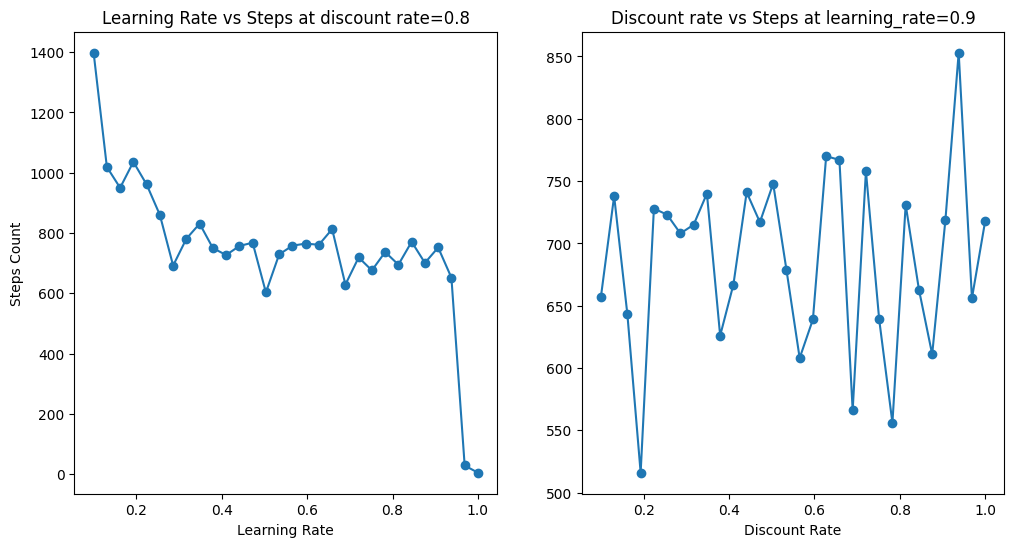

In [ ]:
# plot the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(learning_rates, results_lr, marker='o')
plt.title('Learning Rate vs Steps at discount rate=0.8')
plt.xlabel('Learning Rate')
plt.ylabel('Steps Count')

plt.subplot(1, 2, 2)
plt.plot(discount_rates, results_dr, marker='o')
plt.title('Discount rate vs Steps at learning_rate=0.9')
plt.xlabel('Discount Rate')

In [ ]:
#explore more on discount

discount_rates = np.linspace(0.1, 1.0, 100)

for dr in discount_rates:
    result = main(learning_rate=0.8, discount_rate=dr)
    results_dr.append(result)

n_results_dr = np.linspace(0.1, 1.0, 100)
plt.figure(figsize=(12, 6))

plt.plot(discount_rates, n_results_dr, marker='o')
plt.title('Steps vs Discount Rate at learning_rate=0.9')
plt.xlabel('Discount Rate')
plt.ylabel('Steps Count')



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Steps Count')

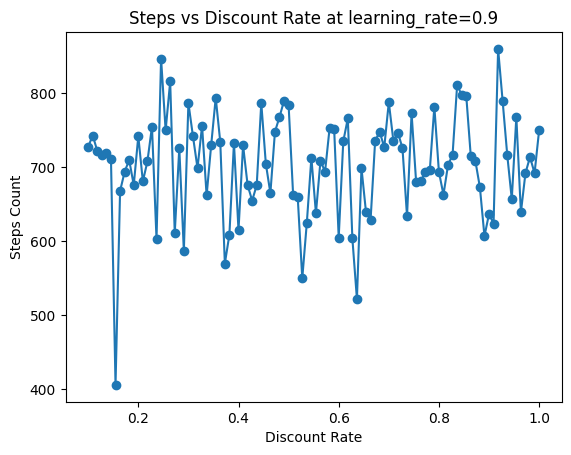

In [ ]:
plt.plot(discount_rates, results_dr[30:], marker='o')
plt.title('Steps vs Discount Rate at learning_rate=0.9')
plt.xlabel('Discount Rate')
plt.ylabel('Steps Count')

In [ ]:
import matplotlib.pyplot as plt

learning_rates =
discount_rates = np.linspace(0.1, 1.0, 20)
results_dr=[]
for dr in discount_rates:
    result = main(learning_rate=0.6, discount_rate=dr)
    results_dr.append(result)

plt.plot(discount_rates, results_dr, marker='o', label)
plt.title('Steps vs Discount Rate at learning_rate=0.9')
plt.xlabel('Discount Rate')
plt.ylabel('Steps Count')


SyntaxError: ignored

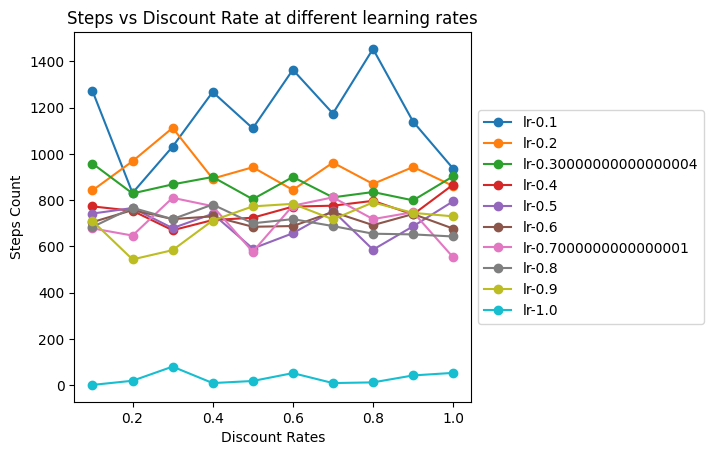

In [ ]:
from matplotlib import pyplot as plt

learning_rates = np.linspace(0.1, 1.0, 10)
discount_rates = np.linspace(0.1, 1.0, 10)
arr = [[1272.,  831., 1031., 1267., 1110., 1363., 1174., 1453., 1139.,
         936.],
       [ 842.,  968., 1112.,  893.,  942.,  844.,  962.,  870.,  943.,
         861.],
       [ 958.,  829.,  868.,  900.,  804.,  900.,  812.,  835.,  799.,
         903.],
       [ 773.,  754.,  670.,  714.,  724.,  772.,  776.,  797.,  738.,
         867.],
       [ 742.,  766.,  679.,  741.,  591.,  657.,  754.,  586.,  687.,
         795.],
       [ 705.,  757.,  718.,  730.,  685.,  688.,  749.,  692.,  740.,
         677.],
       [ 678.,  647.,  810.,  774.,  577.,  776.,  812.,  718.,  748.,
         553.],
       [ 684.,  767.,  718.,  781.,  700.,  718.,  688.,  655.,  652.,
         643.],
       [ 710.,  544.,  584.,  712.,  773.,  784.,  717.,  790.,  745.,
         730.],
       [   2.,   20.,   81.,   10.,   19.,   53.,   10.,   13.,   43.,
          54.]]
arr = np.array(arr)
fig = plt.figure()
ax = plt.subplot(111)

plt.title('Steps vs Discount Rate at different learning rates')
plt.xlabel('Discount Rates')
plt.ylabel('Steps Count')
for step in range(len(arr)):
    ax.plot(discount_rates,arr[step], marker='o', label=f'lr-{learning_rates[step]}')




box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()



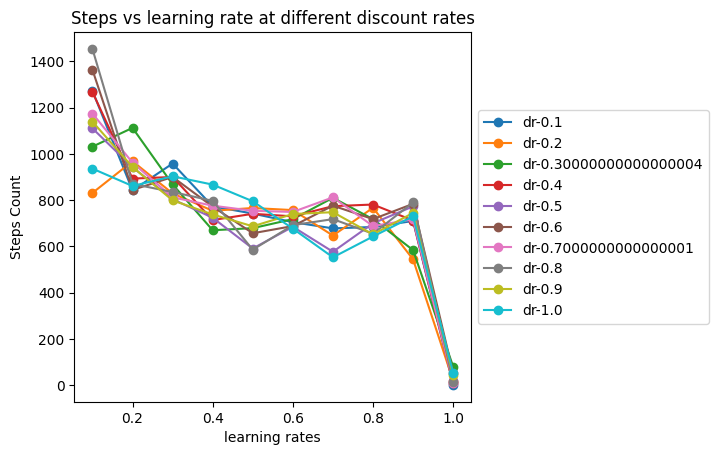

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)

plt.title('Steps vs learning rate at different discount rates')
plt.xlabel('learning rates')
plt.ylabel('Steps Count')
for step in range(len(arr)):
    ax.plot(learning_rates,arr[:,step], marker='o', label=f'dr-{discount_rates[step]}')




box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


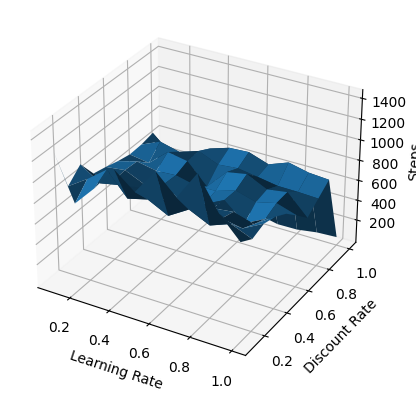

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


learning_rates = np.linspace(0.1, 1.0, 10)
discount_rates = np.linspace(0.1, 1.0, 10)

results = np.zeros((len(learning_rates), len(discount_rates)))


for i, lr in enumerate(learning_rates):
    for j, dr in enumerate(discount_rates):
        result = main(learning_rate=lr, discount_rate=dr)
        results[i, j] = result


lr_mesh, dr_mesh = np.meshgrid(learning_rates, discount_rates)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(lr_mesh, dr_mesh, results)

ax.set_xlabel('Learning Rate')
ax.set_ylabel('Discount Rate')
ax.set_zlabel('Steps')

plt.show()

In [ ]:
results# To take the data to plot in the 3d Graph 😁

array([[1272.,  831., 1031., 1267., 1110., 1363., 1174., 1453., 1139.,
         936.],
       [ 842.,  968., 1112.,  893.,  942.,  844.,  962.,  870.,  943.,
         861.],
       [ 958.,  829.,  868.,  900.,  804.,  900.,  812.,  835.,  799.,
         903.],
       [ 773.,  754.,  670.,  714.,  724.,  772.,  776.,  797.,  738.,
         867.],
       [ 742.,  766.,  679.,  741.,  591.,  657.,  754.,  586.,  687.,
         795.],
       [ 705.,  757.,  718.,  730.,  685.,  688.,  749.,  692.,  740.,
         677.],
       [ 678.,  647.,  810.,  774.,  577.,  776.,  812.,  718.,  748.,
         553.],
       [ 684.,  767.,  718.,  781.,  700.,  718.,  688.,  655.,  652.,
         643.],
       [ 710.,  544.,  584.,  712.,  773.,  784.,  717.,  790.,  745.,
         730.],
       [   2.,   20.,   81.,   10.,   19.,   53.,   10.,   13.,   43.,
          54.]])